# Lesson21

In [60]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True)

class Network(nn.Module):#line 1
    def __init__(self):
        super(Network,self).__init__()# line 3
        #第一层的输入为1，参数依赖数据集（用的是单色图像）
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)
        
        
        self.fc1 = nn.Linear(in_features=12*4*4,out_features=120)
        self.fc2 = nn.Linear(in_features=120,out_features=60) 
        self.out = nn.Linear(in_features=60,out_features=10)
        #最后一层输出为10，分类有10个类别，也依赖数据集
    def forward(self,t):  
        #(1) input layer
        t = t 
        
        #(2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t,kernel_size=2,stride=2)
        
         #(3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t,kernel_size=2,stride=2)
        
        #(4)hidden liner layer
        t = t.reshape(-1,12*4*4)
        t = self.fc1(t)
        t = F.relu(t)
        
        #(5)hidden liner layer
        t = self.fc2(t)
        t = F.relu(t)
        
        #(6) outpur layer
        t = self.out(t)
        #t = F.softmax(t,dim=1)
        
        return t

In [61]:
print(torch.__version__)
print(torchvision.__version__)

1.5.0
0.6.0


# Lesson22

In [62]:
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST'
    ,train = True
    ,download = True
    ,transform = transforms.Compose([
        transforms.ToTensor()
    ])
)


In [63]:
#torch.set_grad_enabled(False)

network = Network()

sample = next(iter(train_set))

image,label = sample
image.shape

image.unsqueeze(0).shape

pred = network(image.unsqueeze(0))

pred.shape

pred

label

pred.argmax(dim=1)

F.softmax(pred,dim=1)

tensor([[0.1058, 0.1102, 0.1013, 0.0940, 0.0896, 0.0934, 0.0984, 0.0957, 0.1107, 0.1008]], grad_fn=<SoftmaxBackward>)

# Lesson23

In [64]:
data_loader = torch.utils.data.DataLoader(train_set,batch_size=10)

batch = next(iter(data_loader))
images,labels = batch

images.shape

preds = network(images)

preds

tensor([[ 0.0663,  0.1069,  0.0228, -0.0521, -0.1000, -0.0587, -0.0066, -0.0346,  0.1112,  0.0174],
        [ 0.0700,  0.1082,  0.0301, -0.0404, -0.1091, -0.0580, -0.0076, -0.0292,  0.1098,  0.0207],
        [ 0.0668,  0.1088,  0.0353, -0.0431, -0.1045, -0.0597, -0.0129, -0.0347,  0.1050,  0.0166],
        [ 0.0670,  0.1102,  0.0315, -0.0433, -0.1072, -0.0563, -0.0123, -0.0320,  0.1083,  0.0186],
        [ 0.0713,  0.1131,  0.0277, -0.0417, -0.1144, -0.0508,  0.0032, -0.0278,  0.1097,  0.0172],
        [ 0.0652,  0.1116,  0.0250, -0.0414, -0.1055, -0.0625, -0.0096, -0.0316,  0.1106,  0.0209],
        [ 0.0655,  0.1114,  0.0316, -0.0492, -0.0987, -0.0671, -0.0090, -0.0406,  0.1078,  0.0174],
        [ 0.0658,  0.1165,  0.0302, -0.0420, -0.1086, -0.0604, -0.0096, -0.0329,  0.1101,  0.0206],
        [ 0.0654,  0.1085,  0.0473, -0.0484, -0.0994, -0.0556, -0.0057, -0.0269,  0.1187,  0.0152],
        [ 0.0604,  0.0998,  0.0349, -0.0566, -0.0888, -0.0627, -0.0074, -0.0329,  0.1160,  0.0155]],

In [46]:
preds.argmax(dim=1)

labels

preds.argmax(dim=1).eq(labels)

preds.argmax(dim=1).eq(labels).sum()

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [65]:
def get_num_correct(preds,labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [66]:
get_num_correct(preds,labels)

0

# Lesson24

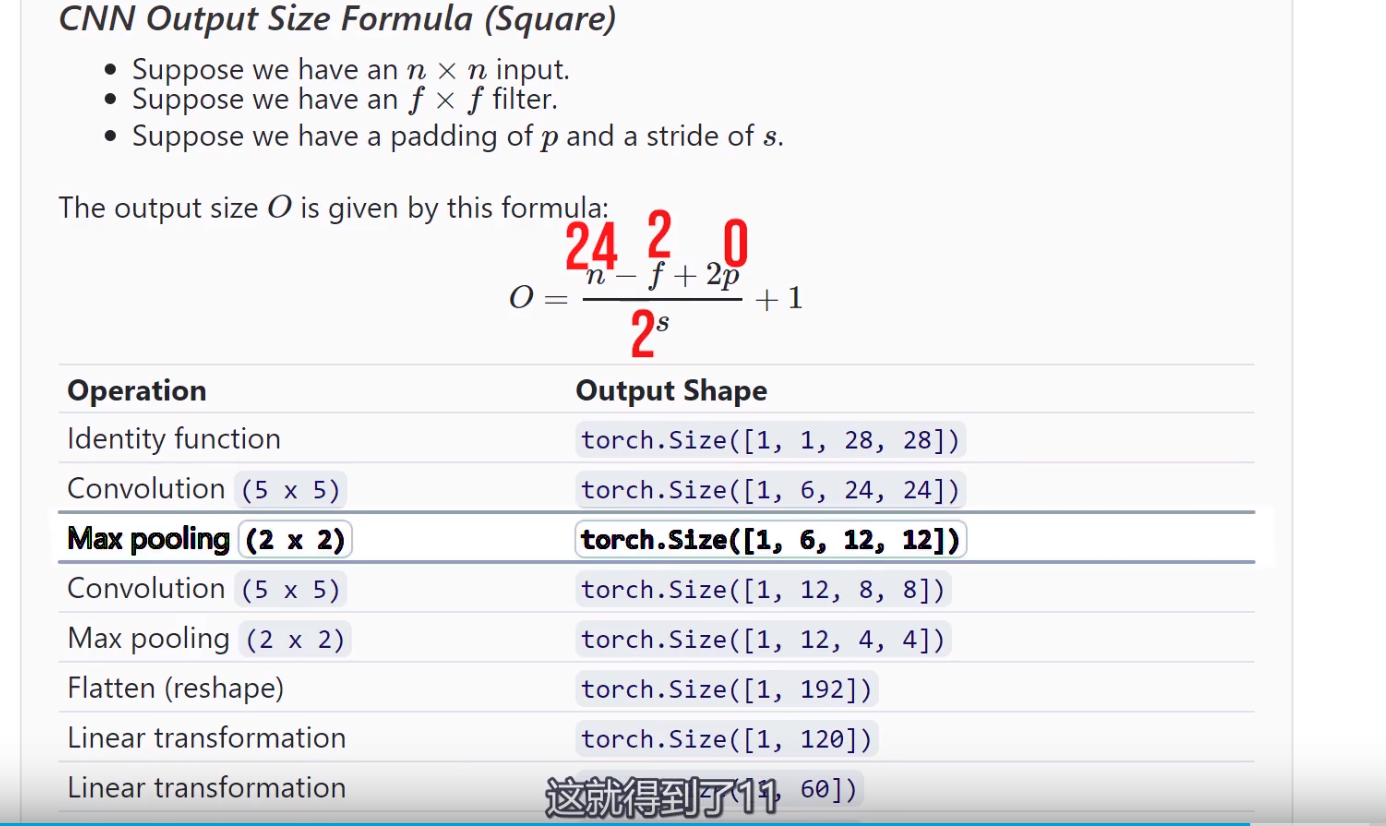

输入值n * n

卷积核f * f

填充p

步长s

maxpooling步长为2

# Lesson25

In [67]:
network = Network()

In [68]:
train_loader = torch.utils.data.DataLoader(train_set,batch_size=100)

batch = next(iter(train_loader))
images,labels = batch

## calculating the loss

In [69]:
preds = network(images)
loss = F.cross_entropy(preds,labels)
loss.item()

2.3117868900299072

## Calculating the Gradients 

In [70]:
print(network.conv1.weight.grad)

None


In [71]:
loss.backward()

In [72]:
network.conv1.weight.grad.shape

torch.Size([6, 1, 5, 5])

##  update the weights

In [74]:
import torch.optim as optim
optimizer = optim.Adam(network.parameters(),lr=0.01)
#learning rate

In [75]:
loss.item()

2.3117868900299072

In [76]:
get_num_correct(preds,labels)

10

In [77]:
optimizer.step()
#updating the weights

In [78]:
preds = network(images)
loss = F.cross_entropy(preds,labels)

In [79]:
loss.item()

2.284958600997925

In [80]:
get_num_correct(preds,labels)

15

Full one batch

In [90]:
network = Network()
train_loader = torch.utils.data.DataLoader(train_set,batch_size=100)
optimizer = optim.Adam(network.parameters(),lr=0.01)

batch = next(iter(train_loader))#get batch
images,labels = batch

preds = network(images)#pass batch
loss = F.cross_entropy(preds,labels)#calculate loss

loss.backward()#calculate gradients
optimizer.step()#update weights

print('loss1:',loss.item())
preds=network(images)
loss = F.cross_entropy(preds,labels)
print('loss2:',loss.item())

loss1: 2.30730938911438
loss2: 2.2762808799743652
